In [71]:
from bagpy import bagreader
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

%matplotlib widget

## Load Data

bagpy is used to load bag files. 
A list of bagreaders is made. One bagreader for each trial. So if an experiment was performed 4 times, a list of 4 bagreaders will be made.

In [72]:
# directory = '/home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading' # uni
directory = '/home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading' # home

In [73]:
# b = []
# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)
#     if not os.path.isdir(f):
#         b.append(bagreader(f))

calibration = []
trial = []
baseline = []
mvc = []

for filename in os.listdir(directory):
    file = os.path.splitext(filename)[0]
    f = os.path.join(directory, filename)
    if not os.path.isdir(f):
        if file == 'calibration':
            calibration.append(bagreader(f))
        elif file.find('trial') != -1:
            trial.append(bagreader(f))
        elif file.find('baseline') != -1:
            baseline.append(bagreader(f))
        elif file.find('mvc') != -1:
            mvc.append(bagreader(f))

[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline2 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial2 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline1 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/mvc already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/calibration already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial3 already exists. Not creating.
[INFO]  Data folder /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline3 already exists. Not creat

### List of available topics 

In [74]:
# Get topics in bag
trial[0].topic_table

,Topics,Types,Message Count,Frequency
0,Ws,std_msgs/Float64,30819,200.038345
1,compensation,std_msgs/Float64,30819,200.043115
2,down_Ws,std_msgs/Float64,30819,200.052657
3,down_sensor,std_msgs/Float64,9656,66.342476
4,emg_raw,std_msgs/Float64MultiArray,5272,19.366788
5,emg_rms,std_msgs/Float64,5298,19.406215
6,held_object,darknet_ros_msgs/BoundingBox,38,0.359176
7,load_trial,sync_msgs/MassTrial,10,0.066667
8,load_type,sync_msgs/TrialType,30,0.333333
9,mass_change,sync_msgs/MassTrial,38,0.359075


### Create csv files of given topics
Topics of all bagfiles saved in a list in corresponding order

In [75]:
mvc[0].topic_table

,Topics,Types,Message Count,Frequency
0,/rms_samples,std_msgs/Float64,636,18.948143


In [77]:
trial_emg_list = []
trial_rms_list = []
trial_type_list = []
trial_state_list = []
trial_mass_list = []
baseline_emg_list = []
baseline_rms_list = []
baseline_type_list = []


for bag in trial:
    if len(os.listdir(bag.datafolder)) == 0:
        trial_emg_list.append(bag.message_by_topic('emg_raw'))
        trial_rms_list.append(bag.message_by_topic('emg_rms'))
        trial_type_list.append(bag.message_by_topic('load_type'))
        trial_state_list.append(bag.message_by_topic('state'))
        trial_mass_list.append(bag.message_by_topic('mass_change'))
    else:
        print("CSV files already exist for: ", bag.datafolder)
        for csv in os.listdir(bag.datafolder):
            file = os.path.splitext(csv)[0]
            target_path = os.path.join(bag.datafolder, csv)
            if 'emg_raw'.find(file) != -1:
                trial_emg_list.append(target_path)
            elif 'emg_rms'.find(file) != -1:
                trial_rms_list.append(target_path)
            elif 'load_type'.find(file) != -1:
                trial_type_list.append(target_path)
            elif 'state'.find(file) != -1:
                trial_state_list.append(target_path)
            elif 'mass_change'.find(file) != -1:
                trial_mass_list.append(target_path)

for bag in baseline:
    folder = os.listdir(bag.datafolder)
    if len(folder) == 0:
        baseline_emg_list.append(bag.message_by_topic('emg_raw'))
        baseline_rms_list.append(bag.message_by_topic('emg_rms'))
        baseline_type_list.append(bag.message_by_topic('load_type'))
    else:
        print("CSV files already exist for: ", bag.datafolder)
        for csv in folder:
            file = os.path.splitext(csv)[0]
            target_path = os.path.join(bag.datafolder, csv)
            if 'emg_raw'.find(file) != -1:
                baseline_emg_list.append(target_path)
            elif 'emg_rms'.find(file) != -1:
                baseline_rms_list.append(target_path)
            elif 'load_type'.find(file) != -1:
                baseline_type_list.append(target_path)


CSV files already exist for:  /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial2
CSV files already exist for:  /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial3
CSV files already exist for:  /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial1
CSV files already exist for:  /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline2
CSV files already exist for:  /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline1
CSV files already exist for:  /home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline3


### Create pandas data frames from csv files

Function to convert csv to data frame:

In [78]:
def csv2df(csv_list):
    df_list = []
    for csv in csv_list:
            df_list.append(pd.read_csv(csv))
    return df_list

In [79]:
trial_emg_dflist = csv2df(trial_emg_list)
trial_rms_dflist = csv2df(trial_rms_list)
trial_type_dflist = csv2df(trial_type_list)
trial_state_dflist = csv2df(trial_state_list)
trial_mass_dflist = csv2df(trial_mass_list)

baseline_emg_dflist = csv2df(baseline_emg_list)
baseline_rms_dflist = csv2df(baseline_rms_list)
baseline_type_dflist = csv2df(baseline_type_list)

#### General information on collected data

In [80]:
# Experiment Information
trial_state_dflist[2]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,q_state.q,q_state.qd,q_state.qdd,tau,force_up,force_down
0,1.686747e+09,118799,1686746875,131069281,NaN,69.468681,-2.297800e-14,0.000000,0.000000,0.0,0.000000
1,1.686747e+09,118800,1686746875,136048454,NaN,69.468681,-2.297800e-14,0.000000,0.000000,0.0,0.000000
2,1.686747e+09,118801,1686746875,141042667,NaN,69.468681,-2.297800e-14,0.000000,0.000000,0.0,0.000000
3,1.686747e+09,118802,1686746875,146073629,NaN,69.468681,-2.297800e-14,0.000000,0.000000,0.0,0.000000
4,1.686747e+09,118803,1686746875,151073402,NaN,69.468681,-2.297800e-14,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
30926,1.686747e+09,149725,1686747029,777350741,NaN,77.875441,-6.838780e+00,-26.148299,-0.081996,0.0,0.025624
30927,1.686747e+09,149726,1686747029,782367136,NaN,77.840511,-6.985953e+00,-29.434635,-0.086085,0.0,0.026902
30928,1.686747e+09,149727,1686747029,787507005,NaN,77.804885,-7.125270e+00,-27.863538,-0.085960,0.0,0.026863
30929,1.686747e+09,149728,1686747029,792392170,NaN,77.768600,-7.257101e+00,-26.366075,-0.085833,0.0,0.026823


In [81]:
# Response Analysis Data
trial_emg_dflist[0]

,Time,layout.dim,layout.data_offset,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9
0,1.686747e+09,[],0,0.004460,0.099893,0.088791,0.009215,0.227905,0.687988,0.624634,-7.519084,14.503817,-4.274809
1,1.686747e+09,[],0,0.004538,0.099854,0.088633,0.009522,0.226196,0.684204,0.621277,-7.312977,14.587787,-4.297710
2,1.686747e+09,[],0,0.004269,0.099590,0.087469,0.010233,0.226685,0.683899,0.620178,-7.786260,14.564885,-4.137404
3,1.686747e+09,[],0,0.004466,0.099595,0.087945,0.009899,0.224670,0.686646,0.618896,-7.725191,14.450381,-4.267176
4,1.686747e+09,[],0,0.005061,0.100312,0.088959,0.010096,0.227966,0.682495,0.620483,-7.603054,14.198473,-4.328244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5267,1.686747e+09,[],0,0.009594,0.011119,0.029222,0.009479,0.287781,0.742188,0.531128,-5.572519,14.343512,-4.610687
5268,1.686747e+09,[],0,0.011437,0.010882,0.048445,0.009342,0.287964,0.738892,0.528992,-6.687023,14.587787,-4.366412
5269,1.686747e+09,[],0,0.010032,0.011286,0.043087,0.010051,0.291748,0.741455,0.527405,-6.801527,14.251908,-4.366412
5270,1.686747e+09,[],0,0.011437,0.009617,0.044317,0.006321,0.286621,0.740601,0.530823,-6.687023,14.465649,-4.190840


In [82]:
trial_rms_dflist[0]

,Time,data
0,1.686747e+09,0.004916
1,1.686747e+09,0.004947
2,1.686747e+09,0.004838
3,1.686747e+09,0.004783
4,1.686747e+09,0.004702
...,...,...
5293,1.686747e+09,0.008802
5294,1.686747e+09,0.008825
5295,1.686747e+09,0.009505
5296,1.686747e+09,0.009874


In [83]:
trial_type_dflist[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,type
0,1.686747e+09,0,1686747183,859125044,NaN,rest
1,1.686747e+09,1,1686747186,859125109,NaN,load
2,1.686747e+09,2,1686747195,859125139,NaN,unload
3,1.686747e+09,3,1686747198,859125171,NaN,rest
4,1.686747e+09,4,1686747201,859125192,NaN,load
5,1.686747e+09,5,1686747210,859125320,NaN,unload
6,1.686747e+09,6,1686747213,859125338,NaN,rest
7,1.686747e+09,7,1686747216,859125355,NaN,load
8,1.686747e+09,8,1686747225,859125482,NaN,unload
9,1.686747e+09,9,1686747228,859125526,NaN,rest


In [84]:
trial_mass_dflist[0]

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,object,mass
0,1.686747e+09,46,1686747188,450250177,NaN,bottle,0.5
1,1.686747e+09,47,1686747188,962761168,NaN,NONE,0.0
2,1.686747e+09,48,1686747190,97697004,NaN,bottle,0.5
3,1.686747e+09,49,1686747190,827503284,NaN,NONE,0.0
4,1.686747e+09,50,1686747203,663230667,NaN,bottle,0.5
5,1.686747e+09,51,1686747212,648167575,NaN,NONE,0.0
6,1.686747e+09,52,1686747218,312883242,NaN,bottle,0.5
7,1.686747e+09,53,1686747223,47616893,NaN,NONE,0.0
8,1.686747e+09,54,1686747223,147786397,NaN,bottle,0.5
9,1.686747e+09,55,1686747223,162751429,NaN,NONE,0.0


## Plot EMG data

In [85]:
plt.style.use('seaborn')

In [76]:
# MVC
mvc_csv = mvc[0].message_by_topic('/rms_samples')
mvc_max = pd.read_csv(mvc_csv)['data'].max()
print("MVC: " + str(mvc_max))

0.0837975294663056


In [86]:
def draw_background(axis, type_array, rms_array, min, max):
    time = type_array['Time'].to_numpy()
    trial_type = type_array['type'].to_numpy()

    trial_time = []

    rest_fill = None
    load_fill = None
    unload_fill = None
    for i in range(time.size):
        if i == time.size - 1:
            trial_time = [time[i] - rms_array['Time'].iloc[0], rms_array['Time'].iloc[-1] - rms_array['Time'].iloc[0]]
        else:
            trial_time = [time[i] - rms_array['Time'].iloc[0], time[i+1] - rms_array['Time'].iloc[0]]

        if trial_type[i] == 'rest':
            rest_fill = axis.fill_between(trial_time, min, max, alpha=0.2, color='blue', label='Rest')
        elif trial_type[i] == 'load':
            load_fill = axis.fill_between(trial_time, min, max, alpha=0.2, color='green', label='Load')
        elif trial_type[i] == 'unload':
            unload_fill = axis.fill_between(trial_time, min, max, alpha=0.2, color='yellow', label='Unload')

    return rest_fill, load_fill, unload_fill

In [87]:
def compute_RMS(data, window_length):
    try:
        data_array = data.to_numpy()
    except AttributeError:
        data_array = data
    rms_emg = np.zeros(data_array.size - window_length)
    # rms_emg = []
    for i in range(data_array.size - window_length):
        window = data_array[i: i + window_length]
        # rms_emg.append(np.sqrt(np.mean(np.square(window))))
        rms_emg[i] = np.sqrt(np.mean(np.square(window)))
    return rms_emg

In [88]:
def plot_overview(trial_type, emg, state, mass, window):
    plt.close('all')
    fig, ax = plt.subplots(3,1)

    # EMG
    ax[0].plot(emg['Time'].iloc[:-window] - emg['Time'].iloc[0], compute_RMS(emg['data_0'], window)/mvc_max, linewidth=1)
    compensation, = ax[0].step(mass['Time'] - emg['Time'].iloc[0], mass['mass']*0.5, where='post', linewidth=0.4, color='red', label='Compensation')
    rest, load, unload = draw_background(ax[0], trial_type, emg, 0, 1)

    ax[0].set_ylim([0.03, 0.3])
    ax[0].set_xlim([trial_type['Time'].iloc[0] - emg['Time'].iloc[0], emg['Time'].iloc[-window-1] - emg['Time'].iloc[0]])
    # ax[0].set_title('EMG Predictive Exo Support')
    ax[0].set_ylabel('Normalized EMG')
    # ax[0].set_yticks([0.1, 0.2, 0.3])
    # ax[0].set_xlabel('Time (s)')
    ax[0].grid(True)
    

    # q
    ax[1].plot(state['Time'] - state['Time'][0], state['q_state.q'], linewidth=1)
    ax[1].step(mass['Time'] - emg['Time'].iloc[0], mass['mass']*230, where='post', linewidth=0.4, color='red', label='Compensation')
    draw_background(ax[1], trial_type, state, 0, 120)
    ax[1].set_xlim([trial_type['Time'].iloc[0] - emg['Time'].iloc[0], emg['Time'].iloc[-window-1] - emg['Time'].iloc[0]])
    ax[1].set_ylim([50, 120])
    ax[1].set_ylabel('q (deg)')


    # mass
    # ax[2].step(trial_mass_dflist[0]['Time'] - trial_emg_dflist[0]['Time'].iloc[0], trial_mass_dflist[0]['mass'], where='post', linewidth=1, color='red')
    # draw_background(ax[2], trial_type_dflist[0], trial_state_dflist[0], 0, 0.6)
    # ax[2].set_xlim([trial_type_dflist[0]['Time'].iloc[0] - trial_emg_dflist[0]['Time'].iloc[0], trial_emg_dflist[0]['Time'].iloc[-window_length-1] - trial_emg_dflist[0]['Time'].iloc[0]])
    # ax[2].set_ylim([0, 0.6])

    # tau
    ax[2].plot(state['Time'] - state['Time'][0], state['tau'], linewidth=1)
    compensation, = ax[2].step(mass['Time'] - emg['Time'].iloc[0], mass['mass']*1.15 - 0.4, where='post', linewidth=0.4, color='red', label='Compensation')
    rest, load, unload = draw_background(ax[2], trial_type, state, -2, 0.2)
    ax[2].set_xlim([trial_type['Time'].iloc[0] - emg['Time'].iloc[0], emg['Time'].iloc[-window-1] - emg['Time'].iloc[0]])
    ax[2].set_ylim([-0.4, 0.2])
    ax[2].set_ylabel('Torque (Nm)')
    ax[2].set_xlabel('Time (s)')
    ax[2].legend([rest, load, unload, compensation], ['Rest', 'Load', 'Unload', 'Compensation'], frameon=True, ncol=4, loc="lower right")

    return fig, ax

In [89]:
def single_EMG(ax, trial_type, emg, window, plot_prediction, mass):
    # plt.close('all')
    # fig, ax = plt.subplots()
    ax.plot(emg['Time'].iloc[:-window] - emg['Time'].iloc[0], compute_RMS(emg['data_0'], window)/mvc_max, linewidth=1)
    rest, load, unload = draw_background(ax, trial_type, emg, 0, 1)


    ax.set_ylim([0.03, 0.3])
    ax.set_xlim([trial_type['Time'].iloc[0] - emg['Time'].iloc[0], emg['Time'].iloc[-1] - emg['Time'].iloc[0]])
    ax.set_ylabel('Normalized EMG RMS')
    ax.set_xlabel('Time (s)')
    ax.set_yticks([0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30])
    ax.grid(True, axis='y')
    if plot_prediction:
        compensation, = ax.step(mass['Time'] - emg['Time'].iloc[0], mass['mass']*0.5, where='post', linewidth=0.4, color='red', label='Compensation')
        ax.legend([rest, load, unload, compensation], ['Rest', 'Load', 'Unload', 'Compensation'], frameon=True, ncol=4)
    else:
        ax.legend([rest, load, unload], ['Rest', 'Load', 'Unload'], frameon=True, ncol=3)

    # return fig, ax

In [90]:
def EMG_comp(trial_type, trial_emg, baseline_type, baseline_emg, window, compensation, mass, direction):
    figure, axis = None, None
    if direction == 'horizontal':
        figure, axis = plt.subplots(1, 2)
    elif direction == 'vertical':
        figure, axis = plt.subplots(2, 1)

    single_EMG(axis[0], trial_type, trial_emg, window, compensation, mass)
    axis[0].set_title('EMG Exoskeleton Support')
    single_EMG(axis[1], baseline_type, baseline_emg, window, False, mass)
    axis[1].set_title('EMG Baseline')
    return figure, axis

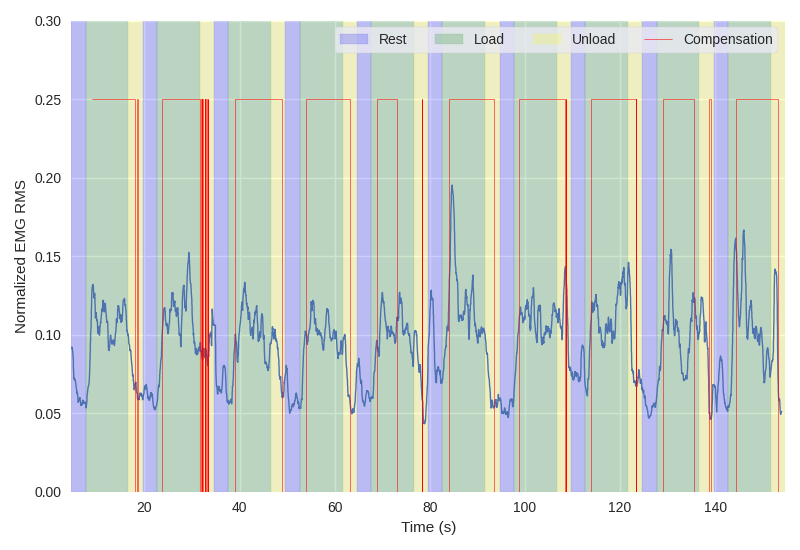

In [91]:
plt.close('all')
i = 2
figure, axis = plt.subplots()
single_EMG(axis, trial_type_dflist[i], trial_emg_dflist[i], 25, True, trial_mass_dflist[i])
plt.tight_layout()

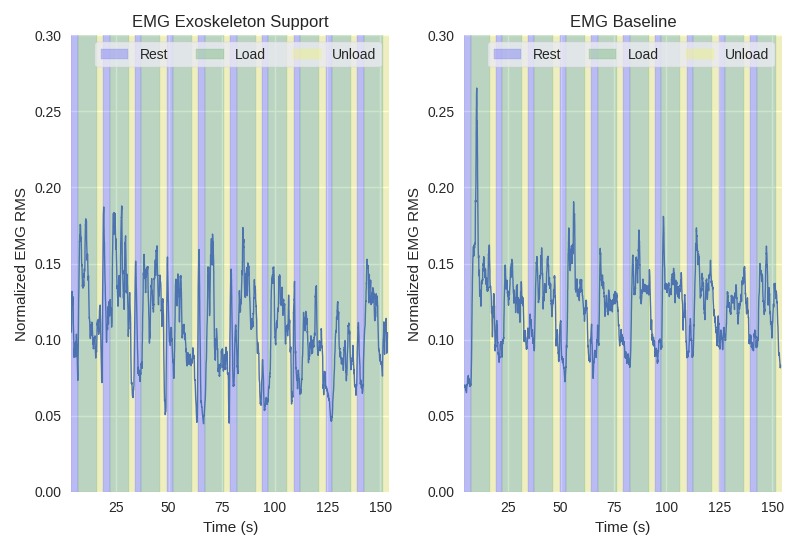

In [104]:
plt.close('all')
i = 0
figure, axis = EMG_comp(trial_type_dflist[i], trial_emg_dflist[i], baseline_type_dflist[i], baseline_emg_dflist[i], 25, False, trial_mass_dflist[i], 'horizontal')
plt.tight_layout()

## Overview Plot

### 1 Trial

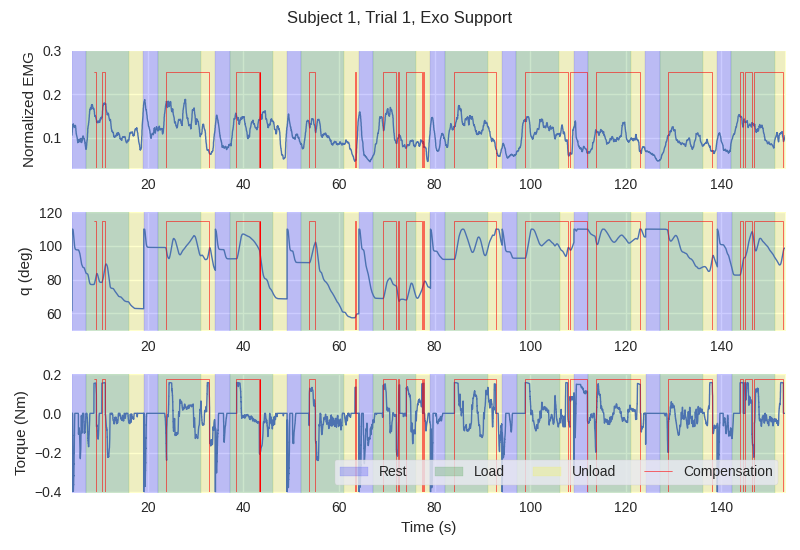

In [105]:
i = 0
window_length = 25
figure, axes = plot_overview(trial_type=trial_type_dflist[i], emg=trial_emg_dflist[i], state=trial_state_dflist[i], mass=trial_mass_dflist[i], window=window_length)
figure.suptitle('Subject 1, Trial ' + str(i+1) + ', Exo Support')
plt.tight_layout()

## Average Plots

In [110]:
def plot_average(axis, emg_list, type_list, window, min, max):
    shortest = emg_list[0]['Time'][emg_list[0]['Time'] >= type_list[0]['Time'][0]]
    shortest_loads = type_list[0]
    for i in range(len(emg_list)):
        filtered_time = emg_list[i]['Time'][emg_list[i]['Time'] >= type_list[i]['Time'][0]]
        if filtered_time.size < shortest.size:
            shortest = filtered_time
            shortest_loads = type_list[i]

    filtered_emg_data = []
    for i in range(len(emg_list)):
        filtered_time = emg_list[i]['Time'][emg_list[i]['Time'] >= type_list[i]['Time'][0]]
        filtered_data = emg_list[i]['data_0'][filtered_time.index]
        filtered_emg_data.append(filtered_data.iloc[:shortest.size].to_numpy())

    avg_emg = (filtered_emg_data[0] + filtered_emg_data[1] + filtered_emg_data[2])/3
    window = 25
    axis.plot(shortest.iloc[:-window] - shortest_loads['Time'].iloc[0], compute_RMS(avg_emg, window)/mvc_max, linewidth=0.75)

    axis.set_xlim([0, shortest.iloc[-window] - shortest_loads['Time'].iloc[0]])
    axis.set_ylim([min, max])


    time = shortest_loads['Time'].to_numpy()
    trial_type = shortest_loads['type'].to_numpy()

    trial_time = []

    rest_fill = None
    load_fill = None
    unload_fill = None
    for i in range(time.size):
        if i == time.size - 1:
            trial_time = [time[i] - shortest_loads['Time'].iloc[0], shortest.iloc[-window] - shortest_loads['Time'].iloc[0]]
        else:
            trial_time = [time[i] - shortest_loads['Time'].iloc[0], time[i+1] - shortest_loads['Time'].iloc[0]]

        if trial_type[i] == 'rest':
            rest_fill = axis.fill_between(trial_time, min, max, alpha=0.2, color='blue', label='Rest')
        elif trial_type[i] == 'load':
            load_fill = axis.fill_between(trial_time, min, max, alpha=0.2, color='green', label='Load')
        elif trial_type[i] == 'unload':
            unload_fill = axis.fill_between(trial_time, min, max, alpha=0.2, color='yellow', label='Unload')

    axis.legend([rest_fill, load_fill, unload_fill], ['Rest', 'Load', 'Unload'], frameon=True)

In [95]:
def average_EMG_comp(trial_type, trial_emg, baseline_type, baseline_emg, window, direction, min, max):
    figure, axis = None, None
    if direction == 'horizontal':
        figure, axis = plt.subplots(1, 2)
    elif direction == 'vertical':
        figure, axis = plt.subplots(2, 1)

    plot_average(axis[0], trial_emg, trial_type, window, min, max)
    axis[0].set_title('Average EMG Exoskeleton Support')
    plot_average(axis[1], baseline_emg, baseline_type, window, min, max)
    axis[1].set_title('Average EMG Baseline')
    return figure, axis

Text(0.5, 1.0, 'Exoskeleton EMG average over all trials for same subject')

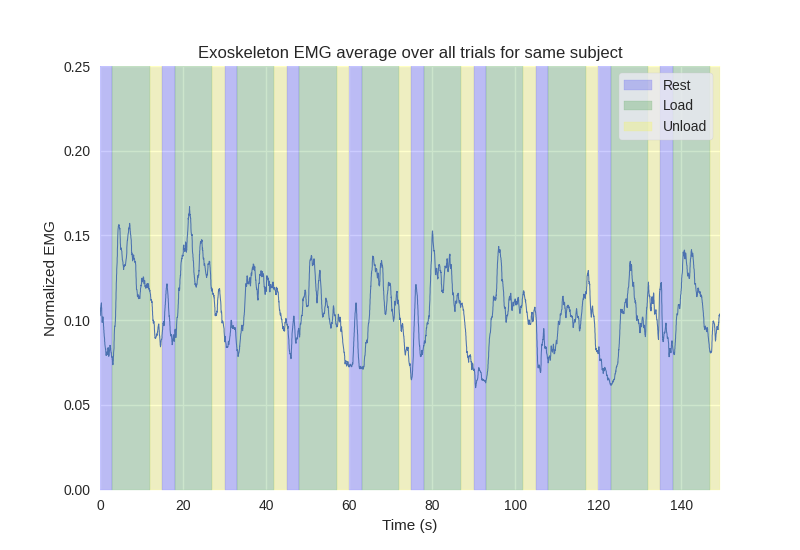

In [111]:
plt.close('all')
figure, axis = plt.subplots()
plot_average(axis, trial_emg_dflist, trial_type_dflist, 25, 0, 0.25)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Exoskeleton EMG average over all trials for same subject')

Text(0.5, 0, 'Time (s)')

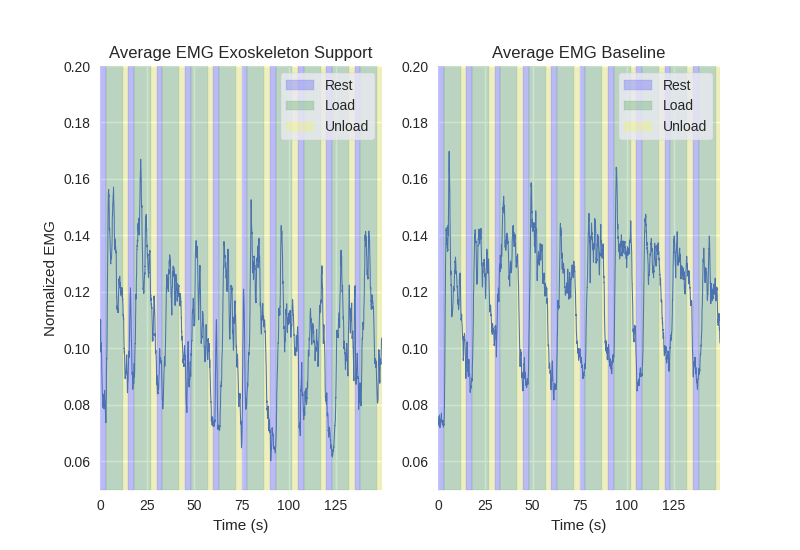

In [112]:
plt.close('all')
figure, axis = average_EMG_comp(trial_type_dflist, trial_emg_dflist, baseline_type_dflist, baseline_emg_dflist, 25, 'horizontal', 0.05, 0.2)
axis[0].set_ylabel('Normalized EMG')
axis[0].set_xlabel('Time (s)')
axis[1].set_xlabel('Time (s)')

# Calculate Averages

In [98]:
def calculate_average(type_data, emg_data):
    # i = 0
    # type_data = trial_type_dflist[i]
    # emg_data = trial_emg_dflist[i]

    rest_emg = np.array([])
    load_emg = np.array([])
    unload_emg = np.array([])

    for i in range(type_data['Time'].size):
        filter_time = None
        filter_data = None
        if i == type_data['Time'].size - 1:
            filter_time = emg_data['Time'][emg_data['Time'] >= type_data['Time'].iloc[i]]
            filter_data = emg_data['data_0'][filter_time.index].to_numpy()
        else:
            filter_time = emg_data['Time'][emg_data['Time'] >= type_data['Time'].iloc[i]]
            filter_time = emg_data['Time'][emg_data['Time'] < type_data['Time'].iloc[i+1]]
            filter_data = emg_data['data_0'][filter_time.index].to_numpy()

        if type_data['type'].iloc[i] == 'rest':
            rest_emg = np.concatenate((rest_emg, filter_data))
        elif type_data['type'].iloc[i] == 'load':
            load_emg = np.concatenate((load_emg, filter_data))
        elif type_data['type'].iloc[i] == 'unload':
            unload_emg = np.concatenate((unload_emg, filter_data))

    rest_avg = np.mean(rest_emg)
    load_avg = np.mean(load_emg)
    unload_avg = np.mean(unload_emg)

    rest_var = np.var(rest_emg)
    load_var = np.var(load_emg)
    unload_var = np.var(unload_emg)

    return rest_avg, load_avg, unload_avg, rest_var, load_var, unload_var

In [99]:
def calculate_average_all(type_list, emg_list):

    rest_avg_list = []
    load_avg_list = []
    unload_avg_list = []
    rest_var_list = []
    load_var_list = []
    unload_var_list = []
    for i in range(len(type_list)):
        rest_avg, load_avg, unload_avg, rest_var, load_var, unload_var = calculate_average(type_list[i], emg_list[i])
        rest_avg_list.append(rest_avg)
        load_avg_list.append(load_avg)
        unload_avg_list.append(unload_avg)
        rest_var_list.append(rest_var)
        load_var_list.append(load_var)
        unload_var_list.append(unload_var)

    return rest_avg_list, load_avg_list, unload_avg_list, rest_var_list, load_var_list, unload_var_list

In [100]:
def load_rest_ratio(load_list, rest_list):
    ratio_list = []
    for i in range(len(load_list)):
        ratio_list.append(load_list[i]/rest_list[i])

    return ratio_list

In [101]:
trial_rest_avg, trial_load_avg, trial_unload_avg, trial_rest_var, trial_load_var, trial_unload_var = calculate_average_all(trial_type_dflist, trial_emg_dflist)
baseline_rest_avg, baseline_load_avg, baseline_unload_avg, baseline_rest_var, baseline_load_var, baseline_unload_var = calculate_average_all(baseline_type_dflist, baseline_emg_dflist)

trial_ratio_list = load_rest_ratio(trial_load_avg, trial_rest_avg)
baseline_ratio_list = load_rest_ratio(baseline_load_avg, baseline_rest_avg)

In [102]:
for i in range(len(trial_rest_avg)):
    print("Trial " + str(i+1) + " rest: " + str(trial_rest_avg[i]) + ", load: " + str(trial_load_avg[i]))

for i in range(len(baseline_rest_avg)):
    print("Baseline " + str(i+1) + " rest: " + str(baseline_rest_avg[i]) + ", load: " + str(baseline_load_avg[i]))

Trial 1 rest: 0.008937384841095056, load: 0.009007782404697053
Trial 2 rest: 0.010172787830684506, load: 0.010236320000700197
Trial 3 rest: 0.00737095535948085, load: 0.007488062782916757
Baseline 1 rest: 0.009754862320408134, load: 0.009885159065220278
Baseline 2 rest: 0.009201064191886871, load: 0.009342311358769596
Baseline 3 rest: 0.009644173163560714, load: 0.009749926161596653


In [103]:
for i in range(len(trial_ratio_list)):
    print("Trial " + str(i+1) + " load to rest ratio: " + str(trial_ratio_list[i]))

for i in range(len(baseline_ratio_list)):
    print("Trial " + str(i+1) + " load to rest ratio: " + str(baseline_ratio_list[i]))

Trial 1 load to rest ratio: 1.00787675196421
Trial 2 load to rest ratio: 1.0062453057188567
Trial 3 load to rest ratio: 1.015887685886644
Trial 1 load to rest ratio: 1.0133571075154542
Trial 2 load to rest ratio: 1.0153511772048358
Trial 3 load to rest ratio: 1.0109654810466815
